In [1]:
%pylab inline
import pandas as pd
from scipy.ndimage import convolve
from scipy.signal import fftconvolve
import numpy as np 
from joblib import Parallel, delayed
from multiprocessing import Pool
import gc
import sys
import fields as fs
from concurrent.futures import ThreadPoolExecutor
from numba import njit, prange
import programas as pg 
import vfinder_mod as vf
import smoothing_library as SL
import h5py
import MAS_library as MASL
import grispy as gsp
import random

Populating the interactive namespace from numpy and matplotlib


In [3]:
rmin = 3
nbines = 20
radios_to_convolve = pg.generar_lista(rmin,rmin+nbines,0.5)
print(radios_to_convolve[:10])

[1.  2.  3.  3.5 4.  4.5 5.  5.5 6.  6.5]


In [4]:
def convolution_modified(field,circle_radio,bin_size):
    # esta modificada para poder hacer convoluciones que sean fraccion de bin
    i = int(circle_radio+1)
    fbines = field.shape[0]
    campo_extendido = np.pad(field,  [(i, i)]*3, mode='wrap')
    
    #kernel_radio = i + 1
    #kernel = pg.generate_circle_matrix_3d(fbines, kernel_radio, dim=3)
    
    kernel = pg.weight_sphere(fbines, bin_size, circle_radio, 5000)
    # normalize the kernel
    kernel = kernel/np.sum(kernel)
    
    # Realizar la convolución
    campo_convolucionado = fftconvolve(campo_extendido, kernel, mode='same')
    center_field = campo_convolucionado[i:i+fbines,i:i+fbines,i:i+fbines]
    
    return center_field

In [11]:
kernel = pg.weight_sphere(14,1,4,1000)

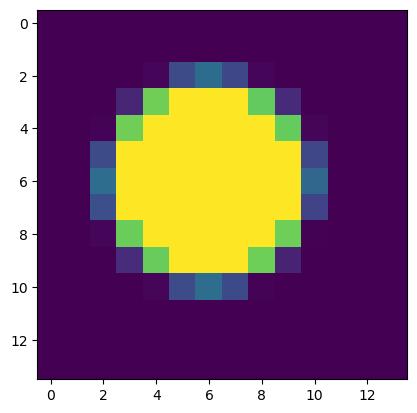

In [12]:
plt.imshow(kernel[7,:,:])

In [ ]:
bines = 10
field = np.ones([10,10,10])


In [ ]:
for radio in radios_to_convolve:
    R = radio*bin_size
    field_integrated = fs.convolution_modified(delta, radio, bin_size)

In [6]:
v = np.loadtxt('/home/arodriguez/BACCO/bias-voids/Void_Finder/cython_ver/no_cython/voids.dat',delimiter=',',skiprows=1)

In [10]:
len(np.unique(v[:,3]))

24

[]

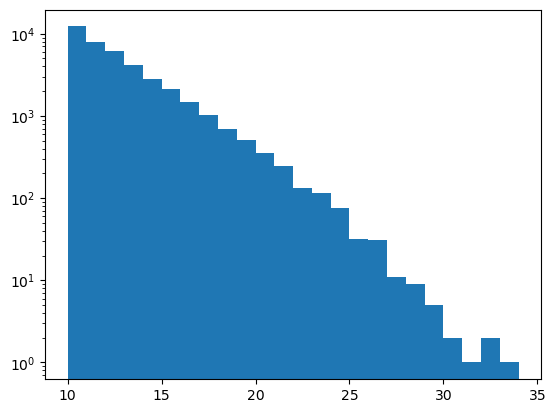

In [11]:
plt.hist(v[:,3],bins=24)
plt.semilogy()